<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/Generate_groupwise_4X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating random numbers from a uniform distribution
https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787125698/12/ch25lvl1sec126/generating-random-numbers-from-a-uniform-distribution

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import random
import statsmodels.api as sm
%matplotlib inline
from google.colab import files
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sp.random.seed(314157)

In [33]:
n=20
rep=0
table_data_all=pd.DataFrame({"rep":[]})
for i in range(1000):
    data = pd.DataFrame({"X1" : sp.random.uniform(20, 100, n),
                         "X2" : sp.random.uniform(20, 100, n),
                         "X3" : sp.random.uniform(20, 100, n),
                         "X4" : sp.random.uniform(20, 100, n)})
    table_data = data.copy()

    table_data.loc[:math.floor(n/2),"e"] = table_data.loc[:math.floor(n/2),"X2"].apply(lambda X2: np.random.normal(0, math.sqrt(0.5)))
    table_data.loc[math.floor(n/2):,"e"] = table_data.loc[math.floor(n/2):,"X2"].apply(lambda X2: np.random.normal(0, math.sqrt(0.5)))
    # display(table_data.loc[:math.floor(n/2),"e"])
    # display(table_data.loc[math.floor(n/2):,"e"])
    # ==========================================

    # table_data = data_new.copy()


    table_data["Y"] = 10 + table_data["X1"] + table_data["X2"] + table_data["X3"] + table_data["X4"] + table_data["e"]
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    new_data = table_data.copy()

    # ==========================================
    x = new_data[["X1", "X2", "X3", "X4"]]
    y = new_data["Y"]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    y_pred = model.predict(x)

    df = pd.DataFrame({"Actual": y, "Predicted": y_pred})

    table_data_new = pd.DataFrame({"x1"    : new_data["X1"],
                                   "x2"    : new_data["X2"],
                                   "x3"    : new_data["X3"],
                                   "x4"    : new_data["X4"],
                                   "e"     : new_data["e"],
                                   "Y"     : df["Actual"],
                                   "y_hat" : df["Predicted"]})
    table_data_new["e_hat"] = table_data_new["Y"] - table_data_new["y_hat"]
    table_data_new["rep"] = rep
    table_data_new = table_data_new.reset_index()
    table_data_new
    # ==========================================
    table_data_all=pd.concat([table_data_all,table_data_new],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==1000:
      break
table_data_all=table_data_all.set_index(["rep", "index"])
table_data_all

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    79.118621  82.483015  87.375010  71.862275 -1.152458  329.686462   
      1.0    23.550291  90.120991  55.708863  34.821396  0.856885  215.058426   
      2.0    39.167741  73.428729  78.792643  50.375639 -0.563915  251.200836   
      3.0    63.289627  32.837587  58.650151  95.742088 -0.406649  260.112804   
      4.0    63.824467  88.096669  53.124080  66.408241  1.108591  282.562048   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   93.202344  31.093516  99.286343  86.147050  0.643117  320.372370   
      16.0   42.744237  77.259777  85.298008  82.900133  0.070901  298.273057   
      17.0   20.191400  38.500785  78.127237  80.114067  0.310037  227.243526   
      18.0   86.955013  48.289977  98.305042  67.395736  1.800785  312.746553   
      19.0   52.700617  92.209859  36.746058  72.576671  0.727787  264.960992   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    330.846718 -1.160255  
      1.0    214.969372  0.089054  
      2.0    251.826834 -0.625998  
      3.0    259.946500  0.166304  
      4.0    282.071375  0.490673  
...                 ...       ...  
999.0 15.0   320.400465 -0.028095  
      16.0   298.426262 -0.153205  
      17.0   226.425681  0.817845  
      18.0   311.758937  0.987616  
      19.0   264.278283  0.682709  

[20000 rows x 8 columns]

In [10]:
tablenew0 = table_data_all.loc[0.0]
tablenew1 = table_data_all.loc[1.0]
tablenew2 = table_data_all.loc[2.0]
tablenew3 = table_data_all.loc[3.0]
tablenew4 = table_data_all.loc[4.0]
tablenew5 = table_data_all.loc[5.0]
tablenew6 = table_data_all.loc[6.0]
tablenew7 = table_data_all.loc[7.0]
tablenew8 = table_data_all.loc[8.0]
tablenew9 = table_data_all.loc[9.0]

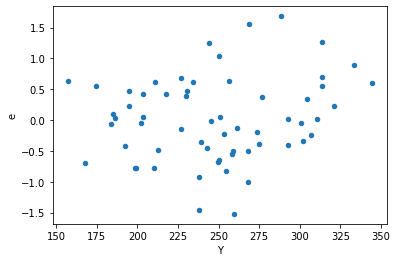

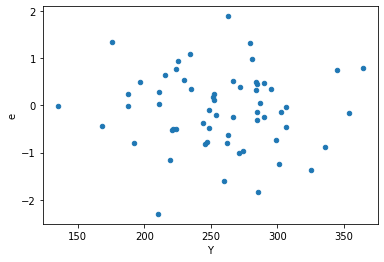

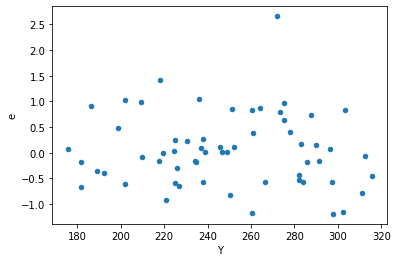

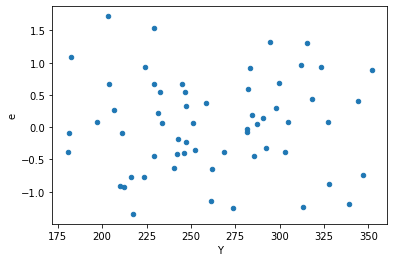

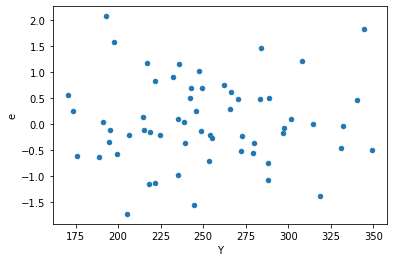

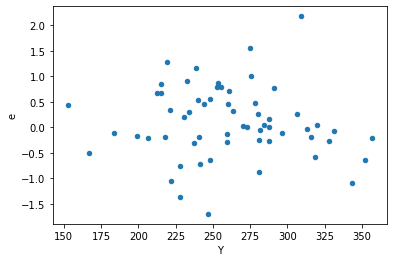

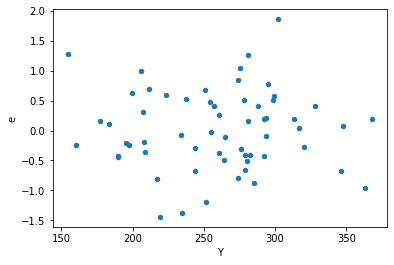

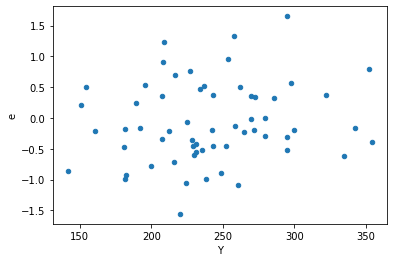

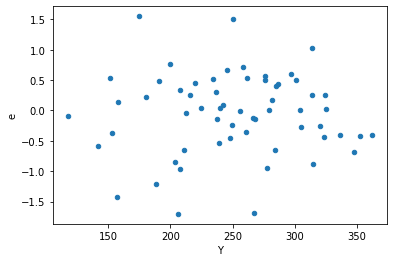

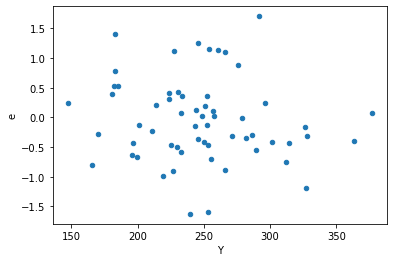

In [11]:
tablenew0.plot(x ='Y', y='e', kind = 'scatter')
tablenew1.plot(x ='Y', y='e', kind = 'scatter')
tablenew2.plot(x ='Y', y='e', kind = 'scatter')
tablenew3.plot(x ='Y', y='e', kind = 'scatter')
tablenew4.plot(x ='Y', y='e', kind = 'scatter')
tablenew5.plot(x ='Y', y='e', kind = 'scatter')
tablenew6.plot(x ='Y', y='e', kind = 'scatter')
tablenew7.plot(x ='Y', y='e', kind = 'scatter')
tablenew8.plot(x ='Y', y='e', kind = 'scatter')
tablenew9.plot(x ='Y', y='e', kind = 'scatter')

In [34]:
table_data_all.to_csv('data_groupwise_0.5_n20.csv')
files.download('data_groupwise_0.5_n20.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>